| |<font size="5"> معالجة جميع البيانات بشكل تسلسلي </font>|
|-:|-:|
|<img src="http://miro.medium.com/max/700/1*dN_m4wEdbRsQ5vGeWYrpuQ.png" width=200></img>||
||<font size="4"> تحميل البيانات  </font>| 
||<font size="4"> تصميم بنية معالجة متسلسلة </font>| 
||<font size="4">  معالجة البيانات الرقمية والنصية</font>| 
||<font size="4">Ridge, SVR, Lasso, DecisionTree تدريب البيانات </font>| 
||<font size="4"> تقويم أداء الخوارزميات </font>| 

In [2]:
pwd

'/content'

In [3]:
cd drive/My\ Drive/ML-Course

/content/drive/My Drive/ML-Course


In [4]:
ls ./data/

abalone.csv                           HousePrice2.csv
Advertising.csv                       HousePrice3.csv
bst_features.csv                      HousePrice_4.csv
bst_target.csv                        housePrice_5.csv
california_housing_test.csv           HousePrice_5.csv
california_housing_train.csv          HousePrice.csv
churn_1.csv                           HousePrice_P.csv
churn_features.csv                    kidney_disease.csv
churn_target.csv                      mushroom_data_all.csv
churn.txt                             pandas_1.csv
data_1.csv                            pandas_2.csv
data_cleaned.csv                      pandas_3.csv
df_merged.cvs                         sales.csv
features_kept1.csv                    sales-funnel.xlsx
features_selected.txt                 wdbc.data
Google_Stock_Price_Test.textClipping  weather.csv
HousePrice1.csv


In [5]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("./data/housePrice_5.csv", index_col=0)

In [6]:
df.head()

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,MiscVal,LotArea,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,Electrical,GarageType,SaleType,SaleCondition,SalePrice
0,5,548,2566,196.0,0,854,706,856,0,8450,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,208500
1,31,460,2524,0.0,298,0,978,1262,0,9600,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,SBrkr,Attchd,WD,Normal,181500
2,6,608,2706,162.0,0,866,486,920,0,11250,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,223500
3,36,642,2473,0.0,0,756,216,961,0,9550,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,SBrkr,Detchd,WD,Abnorml,140000
4,8,836,3343,350.0,192,1053,655,1145,0,14260,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,250000


In [7]:

df.shape

(1460, 31)

![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [8]:
#  طيبعة البيانات  وعدد البيانات الناقصة
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1460 non-null   int64  
 1   GarageArea     1460 non-null   int64  
 2   TotalSF        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   WoodDeckSF     1460 non-null   int64  
 5   2ndFlrSF       1460 non-null   int64  
 6   BsmtFinSF1     1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   MiscVal        1460 non-null   int64  
 9   LotArea        1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Street         1460 non-null   object 
 12  LandContour    1460 non-null   object 
 13  Utilities      1460 non-null   object 
 14  LotConfig      1460 non-null   object 
 15  Neighborhood   1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  Condition2     1460 non-null   object 
 18  BldgType

In [9]:
df.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
df.select_dtypes("number").columns

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF', '2ndFlrSF',
       'BsmtFinSF1', '1stFlrSF', 'MiscVal', 'LotArea', 'SalePrice'],
      dtype='object')

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [11]:

#Standardize the features by removing the mean and scaling to unit variance.
import numpy as np
X=df.drop("SalePrice", axis=1)
y=np.log1p(df.SalePrice)    # test 1st as df.Saleprice  then turn to log1p
# y=df.SalePrice
X.keys()

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF', '2ndFlrSF',
       'BsmtFinSF1', '1stFlrSF', 'MiscVal', 'LotArea', 'MSZoning', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
#  لن نقوم بحذف جميع القيم الناقصة ولكن سنعالجها  (  to carry on From here)
# df.dropna(inplace=True)


In [13]:
df.shape

(1460, 31)

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [14]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)



## Ppeline  توظيف المعالجة المتسلسلة 


In [15]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


<img src="https://i.ibb.co/16B5Nq1/grid-Search-CV.png" width=500></img>

In [16]:

from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import  

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
  

num_pipeline= make_pipeline(
    SimpleImputer(strategy="mean" ),# تحديد الوسيط كبديل عن كل القيم الناقصة في الجدول  " most_frequent"
    StandardScaler()    # تغيير سلم البيانات الرقمية 
)

cat_pipeline= make_pipeline(
    SimpleImputer(strategy="most_frequent" ),# تحديد الوسيط كبديل عن كل القيم الناقصة في الجدول  " most_frequent"
    OneHotEncoder(handle_unknown="ignore", sparse=False)

)

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية  
     (cat_pipeline, selector(dtype_include="object")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف  
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية 
     )

In [17]:

# التحقق من تحويل  البيانات 
preprocess.fit_transform(X_train)

array([[ 1.15858999,  0.01333232, -0.71801762, ...,  0.        ,
         0.        ,  0.        ],
       [-1.10616644, -2.27254222, -0.41623049, ...,  0.        ,
         0.        ,  1.        ],
       [-1.05798013,  1.6991648 ,  0.78126085, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.33518553,  0.45145827, -1.03429053, ...,  0.        ,
         1.        ,  0.        ],
       [-0.67248968, -1.24389868, -0.29792993, ...,  0.        ,
         1.        ,  0.        ],
       [-1.00979383,  0.87053527,  0.41428769, ...,  0.        ,
         1.        ,  0.        ]])

## Cross_validation : Ridge

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [18]:

from sklearn.linear_model import Ridge
  
pipe_Ridge= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    Ridge()
)



In [19]:
 from sklearn.model_selection import cross_val_score
 scores=cross_val_score(pipe_Ridge, 
                      X_train, 
                      y_train, 
                      cv=10,
                      n_jobs=-1)
 f" Score  { scores}"

' Score  [0.86969568 0.71829548 0.79686908 0.31341791 0.82316686 0.83748713\n 0.86114185 0.84727762 0.78501642 0.88330448]'

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [20]:
f" Score  { scores}"

' Score  [0.86969568 0.71829548 0.79686908 0.31341791 0.82316686 0.83748713\n 0.86114185 0.84727762 0.78501642 0.88330448]'

In [21]:
#معدل درجات الدقة في التنبؤ
f" Average Score  :  {scores.mean():.3} +/- {scores.std():.3}"

' Average Score  :  0.774 +/- 0.16'

### Cross_validation : DecisionTreeRegressor

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [22]:
from sklearn.tree import DecisionTreeRegressor
   
pipe_DTR= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    DecisionTreeRegressor( max_depth=5)  # try it with max_depth  then change it to 5 then t0 8 and check the accuracy
)


In [23]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipe_DTR, 
                      X_train, 
                      y_train, 
                      cv=10,
                      n_jobs=-1)
f" Score  { scores}"

' Score  [0.78059221 0.62836797 0.65178806 0.70715317 0.78581724 0.66627227\n 0.70768292 0.76418567 0.77175944 0.63698939]'

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [24]:
f" Score  { scores}"

' Score  [0.78059221 0.62836797 0.65178806 0.70715317 0.78581724 0.66627227\n 0.70768292 0.76418567 0.77175944 0.63698939]'

In [25]:
#معدل درجات الدقة في التنبؤ
f" Average Score  :  {scores.mean():.3} +/- {scores.std():.3}"

' Average Score  :  0.71 +/- 0.059'

In [26]:
from sklearn.linear_model import LinearRegression
   
pipe_LR= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    LinearRegression()
)


In [27]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipe_LR, 
                      X_train, 
                      y_train, 
                      cv=10,
                      n_jobs=-1)
f" Score  { scores}"

' Score  [ 8.77195827e-01 -8.91056193e+19 -2.07330503e+20 -1.74693420e+19\n -9.26334469e+19 -7.05409731e+20 -2.76678774e+19 -2.95829240e+18\n -3.62847104e+20 -1.84090556e+19]'

In [28]:
f" Score  { scores}"

' Score  [ 8.77195827e-01 -8.91056193e+19 -2.07330503e+20 -1.74693420e+19\n -9.26334469e+19 -7.05409731e+20 -2.76678774e+19 -2.95829240e+18\n -3.62847104e+20 -1.84090556e+19]'

In [29]:
#معدل درجات الدقة في التنبؤ
f" Average Score  :  {scores.mean():.3} +/- {scores.std():.3}"

' Average Score  :  -1.52e+20 +/- 2.14e+20'

### Cross_validation : Lasso

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [30]:
from sklearn.linear_model import Lasso   
pipe_Lasso= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    Lasso(alpha=.001)  # try it with max_depth  then change it to 5 then t0 8 and check the accuracy
)


In [31]:
# تغيير طريقة  توزيع البيانات 
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)


In [32]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipe_Lasso, 
                      X_train, 
                      y_train, 
                      cv=kf,
                      n_jobs=-1)
f" Score  { scores}"

' Score  [0.8296049  0.89879277 0.25804892 0.85700037 0.87372067 0.72094711\n 0.77785404 0.83638355 0.86816414 0.84245191]'

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [33]:
f" Score  { scores}"

' Score  [0.8296049  0.89879277 0.25804892 0.85700037 0.87372067 0.72094711\n 0.77785404 0.83638355 0.86816414 0.84245191]'

In [34]:
#معدل درجات الدقة في التنبؤ
f" Average Score  :  {scores.mean():.3} +/- {scores.std():.3}"

' Average Score  :  0.776 +/- 0.179'

### Cross_validation : SVR

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [50]:
from sklearn.svm  import SVR
   
pipe_SVR= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    SVR(C=1.0, epsilon=0.1)
)


In [51]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipe_SVR, 
                      X_train, 
                      y_train, 
                      cv=10,
                      n_jobs=-1)


![](https://i.ibb.co/wQC2qF6/ruler.png)

In [52]:
f" Score  { scores}"

' Score  [0.80451868 0.86089449 0.80134617 0.82626005 0.83419649 0.87377944\n 0.83329434 0.84437491 0.84275773 0.87384341]'

In [53]:
#معدل درجات الدقة في التنبؤ
f" Average Score  :  {scores.mean():.3} +/- {scores.std():.3}"

' Average Score  :  0.84 +/- 0.024'

In [54]:

pipe_SVR.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'svr', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__pipeline-1', 'columntransformer__pipeline-2', 'columntransformer__pipeline-1__memory', 'columntransformer__pipeline-1__steps', 'columntransformer__pipeline-1__verbose', 'columntransformer__pipeline-1__simpleimputer', 'columntransformer__pipeline-1__standardscaler', 'columntransformer__pipeline-1__simpleimputer__add_indicator', 'columntransformer__pipeline-1__simpleimputer__copy', 'columntransformer__pipeline-1__simpleimputer__fill_value', 'columntransformer__pipeline-1__simpleimputer__missing_values', 'columntransformer__pipeline-1__simpleimputer__strategy', 'columntransformer__pipeline-1__simpleimputer__verbose', 'columntransformer__pipeline-1__standardscaler__copy', 'columntransformer__pipelin

In [55]:
from sklearn.model_selection import validation_curve

C = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)

In [56]:

train_scores, test_scores = validation_curve(estimator=pipe_SVR, 
                                              X=X_train, 
                                              y=y_train,
                                              param_name="svr__epsilon" ,
                                              param_range=C, 
                                              cv=10
 )

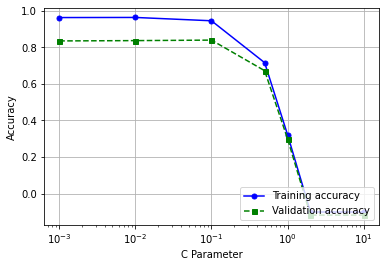

In [57]:
import matplotlib.pyplot as plt

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(C, train_mean, color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(C, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')
plt.grid()
plt.xscale('log')

plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8, 1.03])
plt.show()

https://youtu.be/HdlDYng8g9s